##  E-Handling Missing values by Interpolate Method

In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv('data.csv')
df.head()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943


In [3]:
df.shape

(1000000, 81)

In [4]:
df.isnull()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

row_id        0
F_1_0     18397
F_1_1     18216
F_1_2     18008
F_1_3     18250
          ...  
F_4_10    18225
F_4_11    18119
F_4_12    18306
F_4_13    17995
F_4_14    18267
Length: 81, dtype: int64

In [7]:
df.isnull().sum().sum()


1000000

In [8]:
df1 = df.sample(frac =.05)
df1.shape

(50000, 81)

In [9]:
import datasist as ds #import datasist library
ds.structdata.describe(df1)

First five data points


,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
52118,52118,-0.305105,-0.705924,1.817746,0.521611,0.950722,0.835468,2.001297,0.141855,1.321768,...,-2.844199,-2.247046,3.419029,0.827194,0.564173,1.377661,-1.403152,0.860694,-1.457934,0.269839
659061,659061,-0.735602,-0.649954,-1.110481,0.011743,1.663455,-2.244371,1.157617,-1.092305,-0.564150,...,-0.767364,-0.261876,0.897643,-0.740732,0.027021,-0.935701,9.978479,-4.407585,0.438509,1.280861
346856,346856,NaN,0.124129,-1.371775,-0.222707,0.126890,1.575089,0.297909,-0.062528,1.067246,...,0.145701,-5.596737,2.077931,0.312936,0.271673,0.872162,1.189750,2.222686,-1.735806,-0.540562
629773,629773,0.136138,1.526048,-2.785297,0.416921,-0.215340,0.011284,-0.565002,-0.029983,0.808422,...,-2.998887,-0.761047,0.899354,0.900166,0.175342,-0.206407,-5.102529,0.968490,-2.740172,-0.468728
628811,628811,-0.338813,-0.340892,1.523880,-0.760730,1.507752,1.587298,1.084953,-1.369556,0.596480,...,-1.164599,2.219592,-0.468839,0.102242,0.752091,-0.005860,3.349655,-0.042297,-1.759560,0.531078




Random five data points


,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
772176,772176,-0.534169,1.529524,0.248773,-0.635351,1.085698,0.797783,-0.307770,-0.134925,0.013030,...,3.433545,-4.437883,-1.044571,-3.231281,1.070637,0.372794,9.302572,-4.526450,1.553410,-0.824855
380436,380436,-2.471187,-0.722604,-1.545783,0.786023,-0.027620,1.113862,0.423466,0.664772,1.246629,...,-2.701929,-0.340931,-0.405334,1.361863,-1.318203,1.276261,-4.838220,-2.958935,3.349053,-0.434861
136224,136224,-0.734503,0.631853,0.819982,-1.268991,1.760582,-1.623087,-0.271695,-0.661468,-0.299945,...,-1.366428,3.747786,0.189305,-0.817186,0.102715,-0.011620,2.511562,0.485971,1.387636,-0.153313
533790,533790,-2.195552,0.312325,1.837451,-1.174891,0.323118,0.037630,-1.810643,0.532904,1.040254,...,2.292610,-1.409814,0.208138,-0.079944,0.288149,0.074858,1.731496,-3.716514,-0.528628,-1.679067
557905,557905,1.007900,-0.731591,-0.370720,1.319114,0.159773,0.543937,-1.248894,0.363360,0.100492,...,-0.460336,1.868241,-0.823320,-1.579115,-0.189292,1.092120,8.033326,-1.679873,-0.862114,0.063886




Last five data points


,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
932095,932095,0.366284,-0.233486,-0.107076,0.827204,-0.922904,0.038402,0.331439,1.423673,0.269828,...,2.070893,-2.883376,-1.686428,-0.244522,NaN,-0.612152,-4.533166,3.411313,4.285896,-0.406339
589645,589645,0.624084,1.344415,-0.438228,0.328137,2.260804,1.674719,0.819048,-0.110572,-2.006036,...,-1.158640,-1.709056,-0.590179,-0.105081,0.514371,0.123256,5.777050,0.955198,-1.409362,0.960015
348531,348531,-0.464944,-0.088684,-1.002205,1.233209,0.219189,-1.107885,0.510099,0.127311,-0.102013,...,-2.535003,1.619330,5.083651,-0.691115,-1.225614,-1.834797,-2.200219,2.559821,0.707286,0.205022
66687,66687,0.366880,0.892342,-1.036878,0.978973,-0.118582,-1.409380,0.261772,0.627636,0.036274,...,-0.834862,4.614492,-2.308543,0.439132,0.288873,-0.163526,-3.723096,-3.841415,0.454970,-0.561869
507836,507836,-0.621398,0.309098,-1.126941,0.511195,1.103438,-1.038154,-0.470222,0.177551,1.419250,...,0.464077,-1.160891,-0.357086,0.837662,-0.328561,0.039821,-8.746296,3.751442,-1.280911,-1.095667




Shape of  data set: (50000, 81)


Size of  data set: 4050000


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
row_id,int64
F_1_0,float64
F_1_1,float64
F_1_2,float64
F_1_3,float64
...,...
F_4_10,float64
F_4_11,float64
F_4_12,float64
F_4_13,float64




Numerical Features in Data set
['row_id', 'F_1_0', 'F_1_1', 'F_1_2', 'F_1_3', 'F_1_4', 'F_1_5', 'F_1_6', 'F_1_7', 'F_1_8', 'F_1_9', 'F_1_10', 'F_1_11', 'F_1_12', 'F_1_13', 'F_1_14', 'F_2_0', 'F_2_1', 'F_2_2', 'F_2_3', 'F_2_4', 'F_2_5', 'F_2_6', 'F_2_7', 'F_2_8', 'F_2_9', 'F_2_10', 'F_2_11', 'F_2_12', 'F_2_13', 'F_2_14', 'F_2_15', 'F_2_16', 'F_2_17', 'F_2_18', 'F_2_19', 'F_2_20', 'F_2_21', 'F_2_22', 'F_2_23', 'F_2_24', 'F_3_0', 'F_3_1', 'F_3_2', 'F_3_3', 'F_3_4', 'F_3_5', 'F_3_6', 'F_3_7', 'F_3_8', 'F_3_9', 'F_3_10', 'F_3_11', 'F_3_12', 'F_3_13', 'F_3_14', 'F_3_15', 'F_3_16', 'F_3_17', 'F_3_18', 'F_3_19', 'F_3_20', 'F_3_21', 'F_3_22', 'F_3_23', 'F_3_24', 'F_4_0', 'F_4_1', 'F_4_2', 'F_4_3', 'F_4_4', 'F_4_5', 'F_4_6', 'F_4_7', 'F_4_8', 'F_4_9', 'F_4_10', 'F_4_11', 'F_4_12', 'F_4_13', 'F_4_14']


Categorical Features in Data set


[]



Statistical Description of Columns


,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
count,50000.000000,49134.000000,49079.000000,49144.000000,49121.000000,49078.000000,49056.000000,49122.000000,49063.000000,49082.000000,...,49094.000000,49051.000000,49086.000000,49094.000000,49120.000000,49104.000000,49082.000000,49102.000000,49102.000000,49058.000000
mean,498726.507540,-0.001579,0.003225,0.006628,-0.002510,0.001056,0.012657,-0.003663,-0.059441,-0.000952,...,0.331280,0.023067,0.326381,-0.064648,-0.074564,0.038283,0.521719,0.335798,0.334931,0.036095
std,288519.399492,1.002863,1.002595,0.998295,1.006696,1.002059,1.003335,0.998046,0.728321,1.002066,...,2.363678,2.300653,2.358081,0.776640,0.804279,0.708734,4.972125,2.371787,2.354662,0.773655
min,9.000000,-4.139868,-4.790594,-3.991924,-3.949342,-4.232825,-4.160637,-4.338878,-4.549443,-4.427965,...,-9.616523,-9.648576,-9.755679,-6.552848,-5.651991,-4.586234,-21.111051,-11.140349,-8.461883,-4.992682
25%,249064.000000,-0.681175,-0.665277,-0.668362,-0.677243,-0.675362,-0.668289,-0.679796,-0.496965,-0.676513,...,-1.281756,-1.563702,-1.231616,-0.508284,-0.566122,-0.389877,-2.811741,-1.259111,-1.277489,-0.395402
50%,496650.500000,-0.000019,0.003328,0.009444,-0.001323,0.003832,0.013082,-0.004525,0.009401,-0.004689,...,0.302490,-0.046359,0.360007,0.026401,-0.026409,0.105861,0.199356,0.345811,0.297420,0.127550
75%,749333.250000,0.678047,0.677515,0.677622,0.679017,0.673433,0.688051,0.666537,0.449593,0.673574,...,1.913210,1.542860,1.907503,0.480230,0.486327,0.531048,3.575528,1.941047,1.922392,0.572670
max,999953.000000,4.114598,4.430051,4.252490,4.782744,4.503732,4.068011,4.349364,2.451543,4.851365,...,9.941796,10.676580,12.536151,2.042377,2.339648,2.295131,27.195270,10.448435,10.798896,2.319523




Description of Categorical Features


C:\Users\PC\anaconda3\lib\site-packages\datasist\structdata.py:81: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(date_cols) is not 0:
C:\Users\PC\anaconda3\lib\site-packages\datasist\structdata.py:81: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(date_cols) is not 0:
C:\Users\PC\anaconda3\lib\site-packages\datasist\structdata.py:81: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(date_cols) is not 0:


ValueError: No objects to concatenate

In [10]:
ds.structdata.display_missing(df1)

,features,missing_counts,missing_percent
0,row_id,0,0.0
1,F_1_0,866,1.7
2,F_1_1,921,1.8
3,F_1_2,856,1.7
4,F_1_3,879,1.8
...,...,...,...
76,F_4_10,896,1.8
77,F_4_11,918,1.8
78,F_4_12,898,1.8
79,F_4_13,898,1.8


In [11]:
import matplotlib.pyplot as plt
ds.visualizations.countplot(df1)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


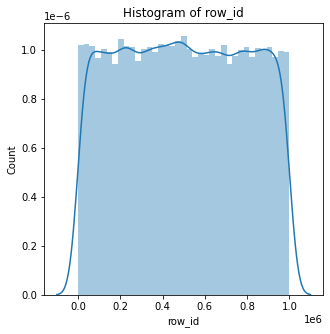

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


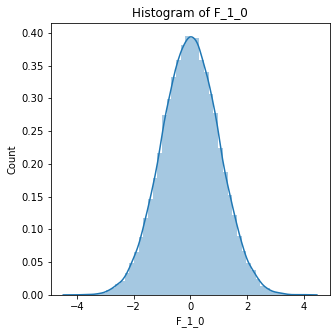

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


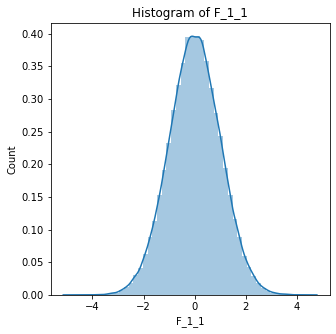

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


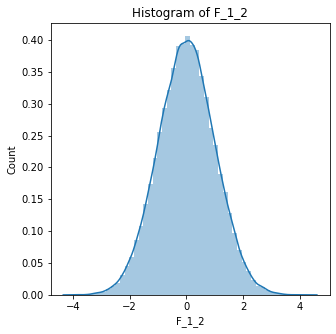

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


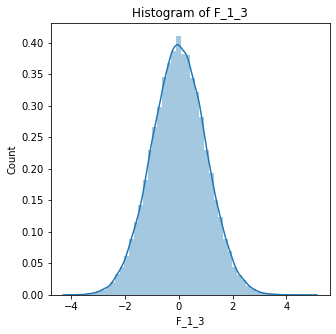

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


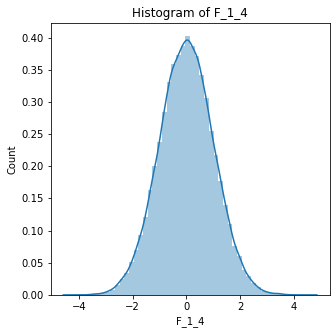

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


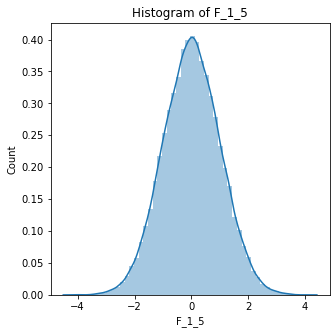

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


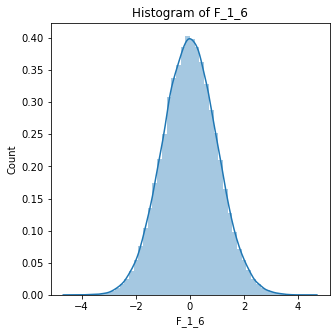

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


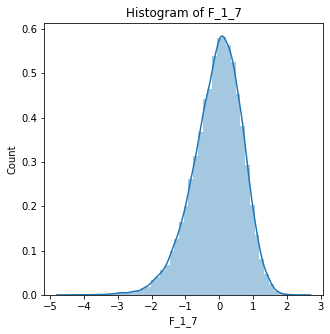

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


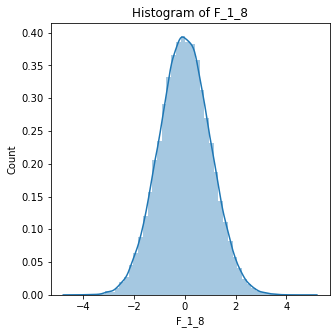

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


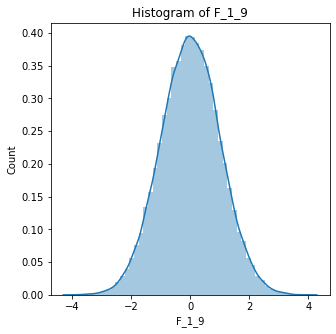

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


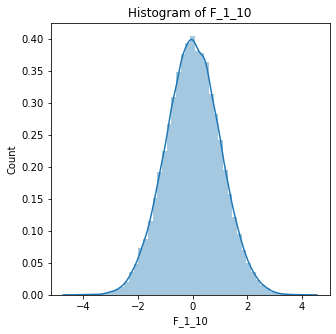

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


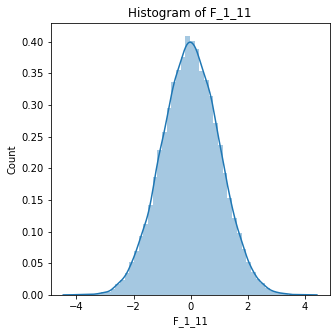

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


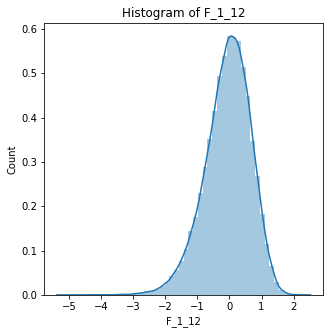

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


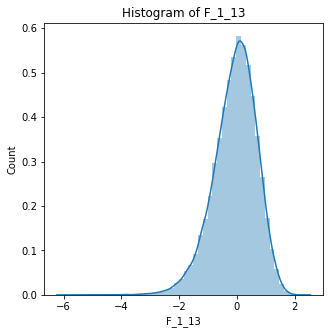

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


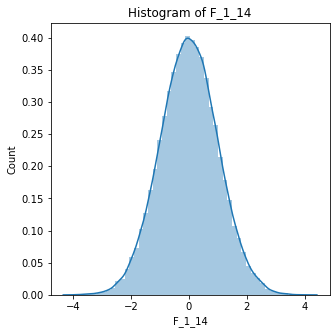

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


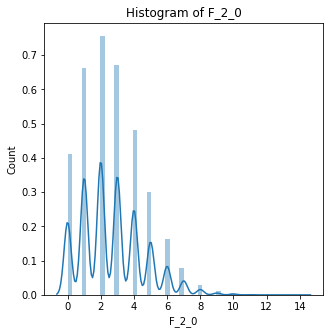

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


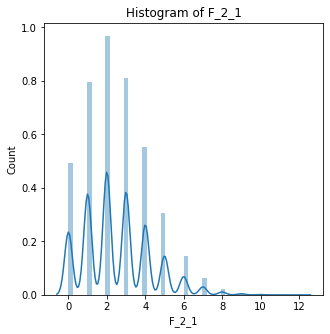

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


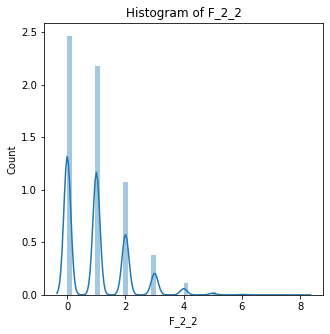

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


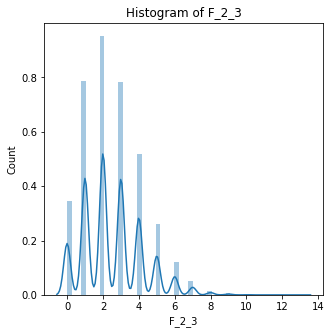

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


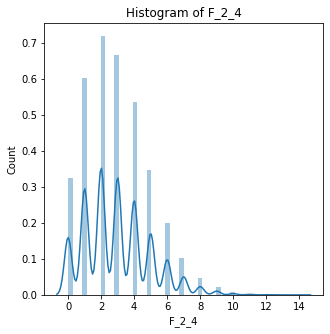

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


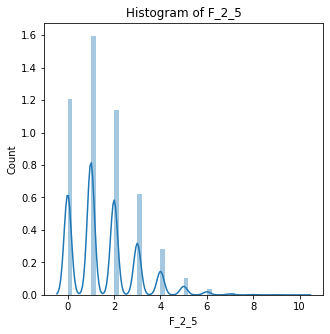

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


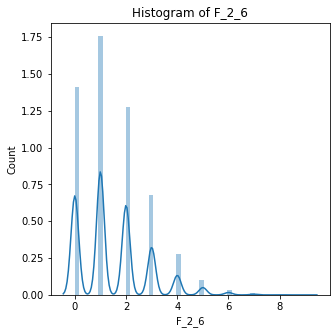

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


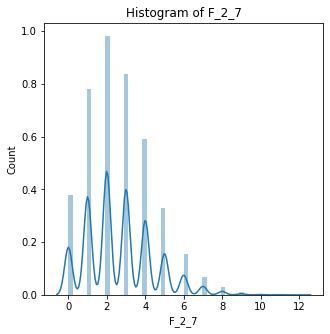

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


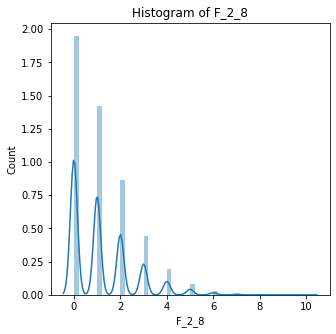

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


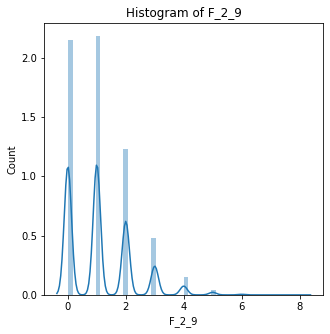

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


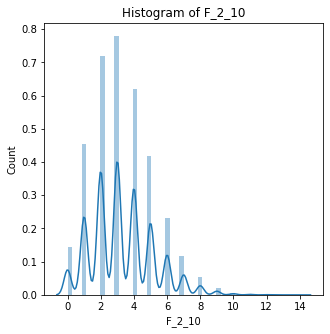

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


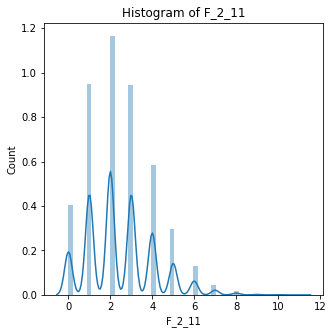

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


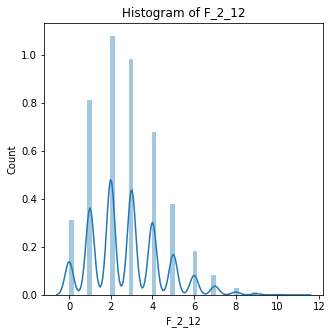

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


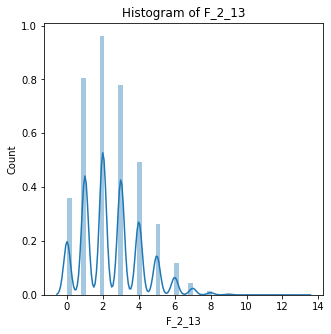

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


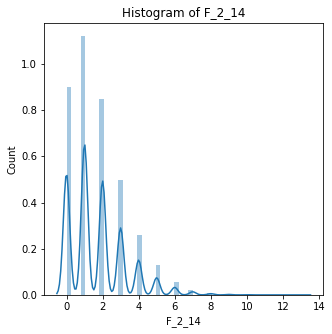

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


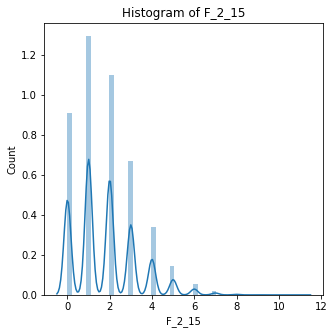

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


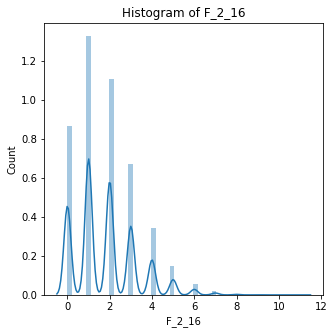

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


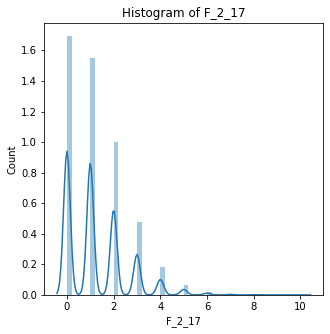

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


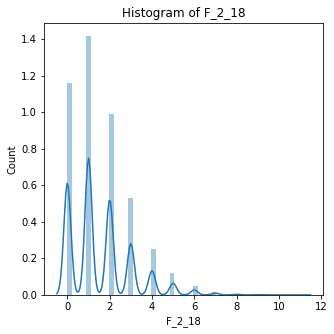

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


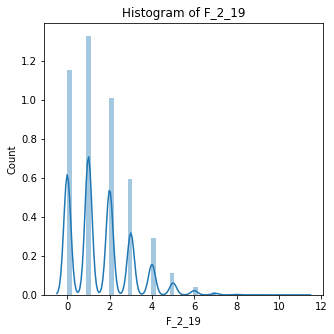

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


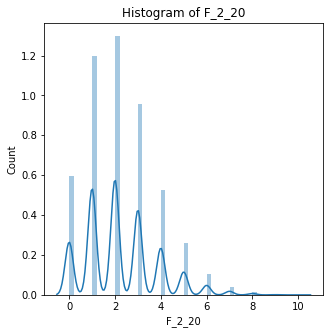

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


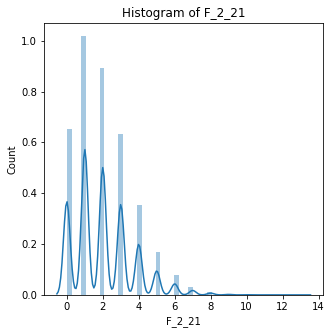

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


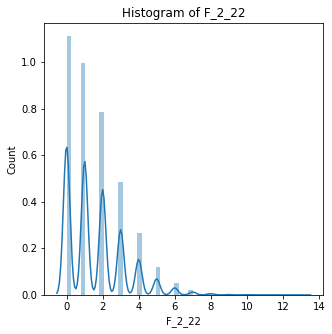

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


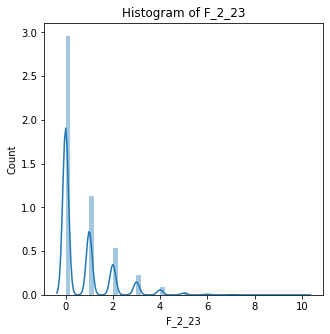

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


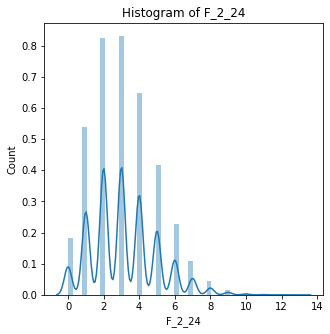

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


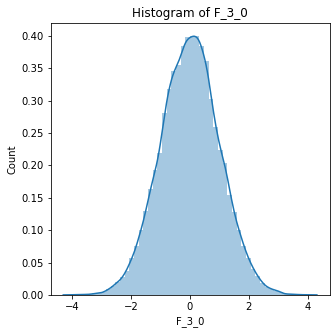

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


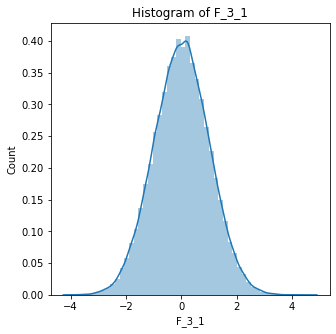

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


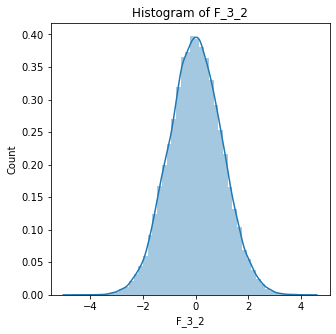

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


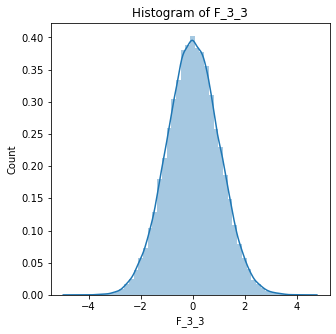

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


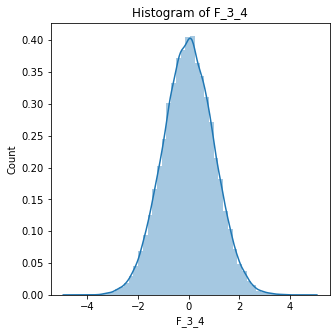

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


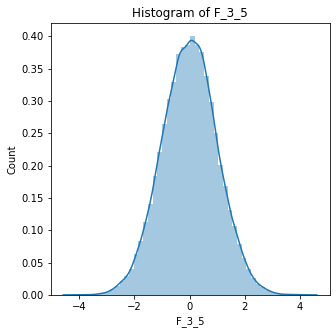

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


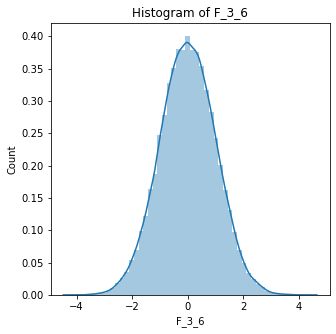

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


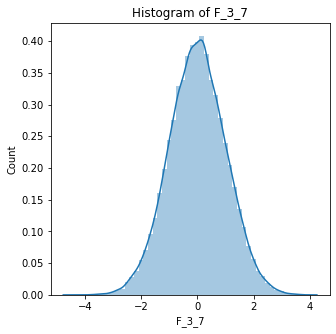

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


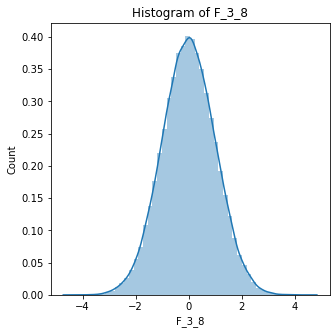

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


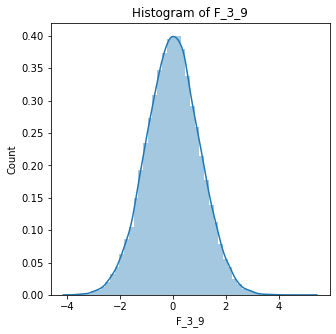

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


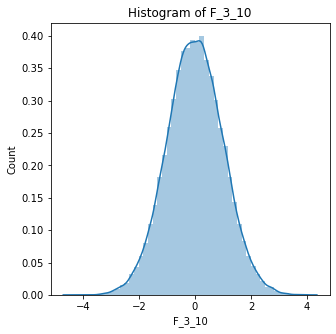

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


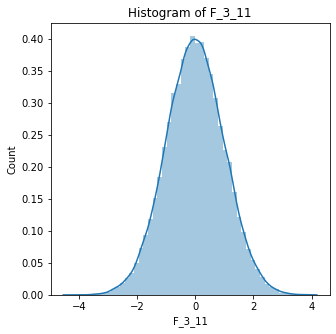

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


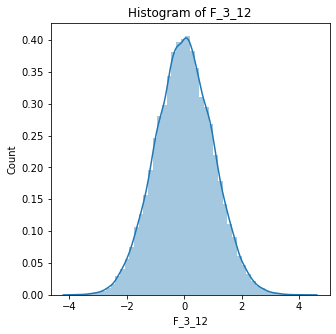

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


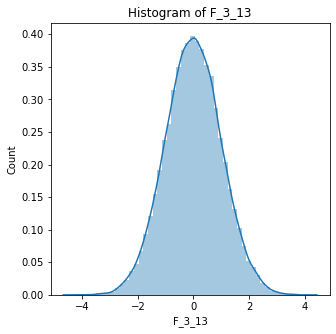

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


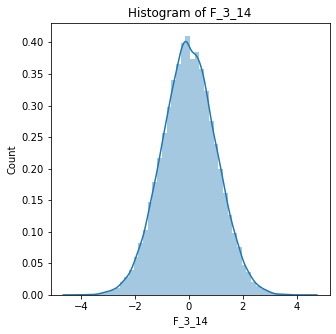

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


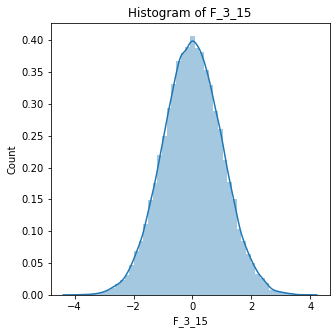

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


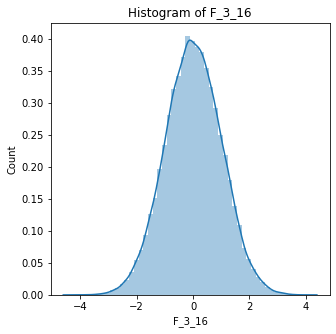

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


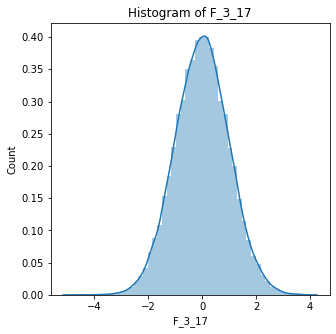

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


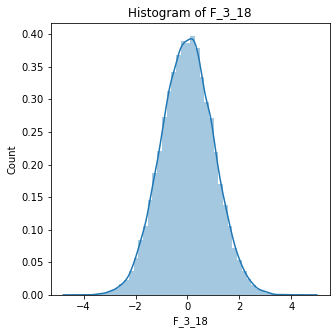

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


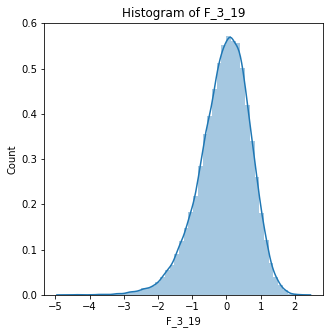

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


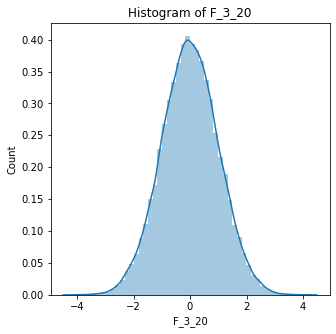

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


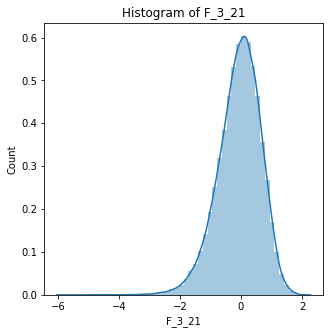

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


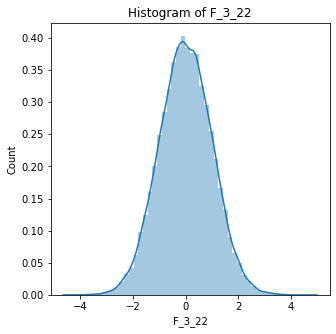

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


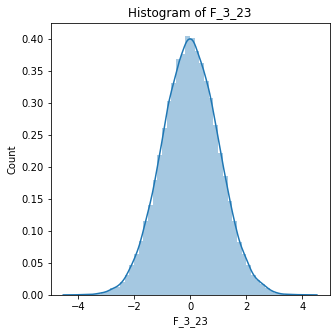

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


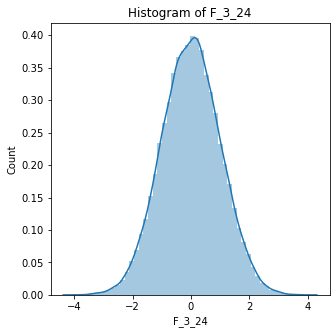

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


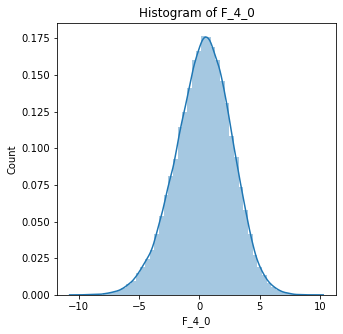

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


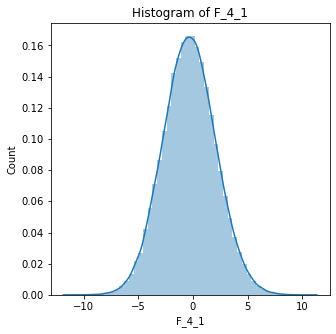

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


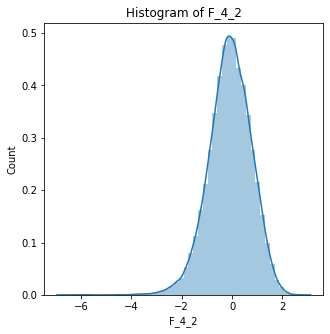

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


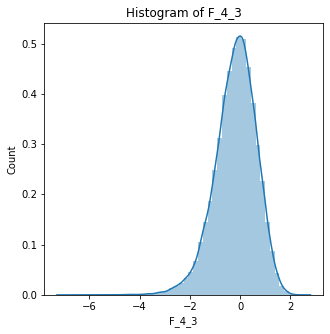

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


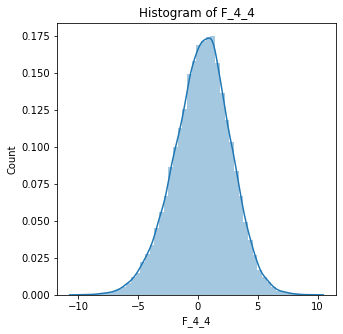

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


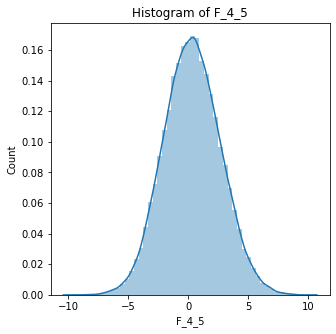

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


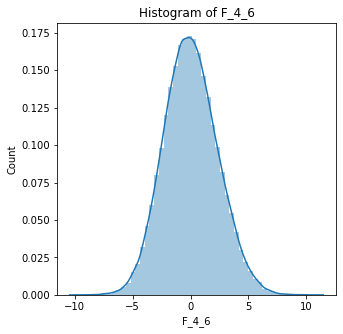

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


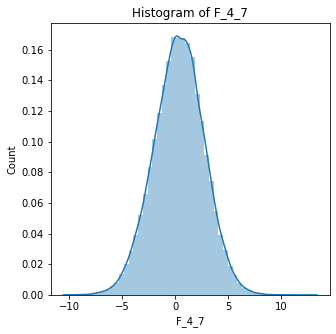

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


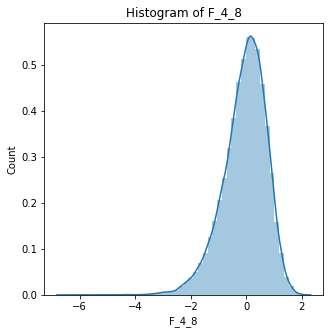

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


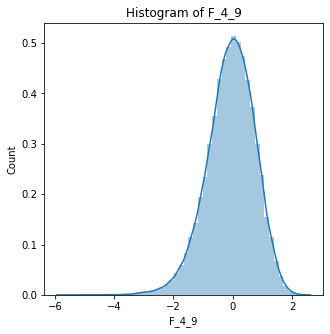

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


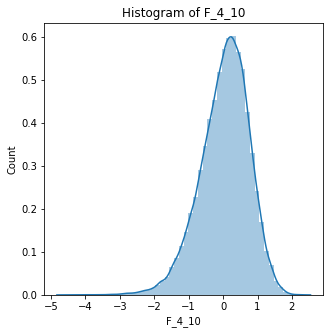

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


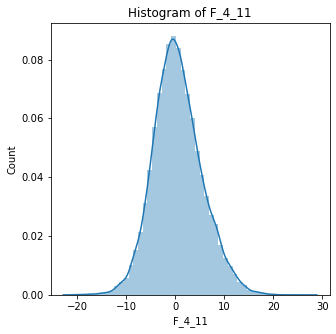

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


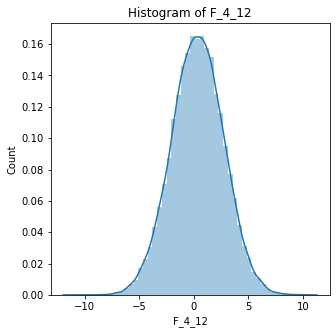

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


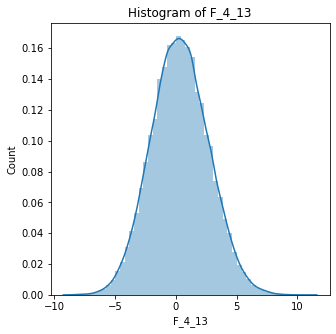

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


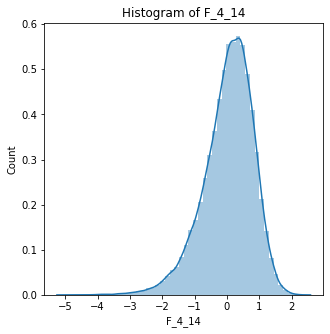

In [12]:
ds.visualizations.histogram(df1)

In [12]:
df1.isnull().sum()

row_id      0
F_1_0     866
F_1_1     912
F_1_2     896
F_1_3     984
         ... 
F_4_10    919
F_4_11    940
F_4_12    902
F_4_13    870
F_4_14    854
Length: 81, dtype: int64

In [13]:
df1.isnull().sum().sum()

49827

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 215715 to 691406
Data columns (total 81 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   row_id  50000 non-null  int64  
 1   F_1_0   49134 non-null  float64
 2   F_1_1   49088 non-null  float64
 3   F_1_2   49104 non-null  float64
 4   F_1_3   49016 non-null  float64
 5   F_1_4   49086 non-null  float64
 6   F_1_5   49059 non-null  float64
 7   F_1_6   49137 non-null  float64
 8   F_1_7   49099 non-null  float64
 9   F_1_8   49112 non-null  float64
 10  F_1_9   49123 non-null  float64
 11  F_1_10  49106 non-null  float64
 12  F_1_11  49081 non-null  float64
 13  F_1_12  49189 non-null  float64
 14  F_1_13  49059 non-null  float64
 15  F_1_14  49116 non-null  float64
 16  F_2_0   50000 non-null  int64  
 17  F_2_1   50000 non-null  int64  
 18  F_2_2   50000 non-null  int64  
 19  F_2_3   50000 non-null  int64  
 20  F_2_4   50000 non-null  int64  
 21  F_2_5   50000 non-null  int64

In [13]:
df1.describe()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
count,50000.000000,49134.000000,49079.000000,49144.000000,49121.000000,49078.000000,49056.000000,49122.000000,49063.000000,49082.000000,...,49094.000000,49051.000000,49086.000000,49094.000000,49120.000000,49104.000000,49082.000000,49102.000000,49102.000000,49058.000000
mean,498726.507540,-0.001579,0.003225,0.006628,-0.002510,0.001056,0.012657,-0.003663,-0.059441,-0.000952,...,0.331280,0.023067,0.326381,-0.064648,-0.074564,0.038283,0.521719,0.335798,0.334931,0.036095
std,288519.399492,1.002863,1.002595,0.998295,1.006696,1.002059,1.003335,0.998046,0.728321,1.002066,...,2.363678,2.300653,2.358081,0.776640,0.804279,0.708734,4.972125,2.371787,2.354662,0.773655
min,9.000000,-4.139868,-4.790594,-3.991924,-3.949342,-4.232825,-4.160637,-4.338878,-4.549443,-4.427965,...,-9.616523,-9.648576,-9.755679,-6.552848,-5.651991,-4.586234,-21.111051,-11.140349,-8.461883,-4.992682
25%,249064.000000,-0.681175,-0.665277,-0.668362,-0.677243,-0.675362,-0.668289,-0.679796,-0.496965,-0.676513,...,-1.281756,-1.563702,-1.231616,-0.508284,-0.566122,-0.389877,-2.811741,-1.259111,-1.277489,-0.395402
50%,496650.500000,-0.000019,0.003328,0.009444,-0.001323,0.003832,0.013082,-0.004525,0.009401,-0.004689,...,0.302490,-0.046359,0.360007,0.026401,-0.026409,0.105861,0.199356,0.345811,0.297420,0.127550
75%,749333.250000,0.678047,0.677515,0.677622,0.679017,0.673433,0.688051,0.666537,0.449593,0.673574,...,1.913210,1.542860,1.907503,0.480230,0.486327,0.531048,3.575528,1.941047,1.922392,0.572670
max,999953.000000,4.114598,4.430051,4.252490,4.782744,4.503732,4.068011,4.349364,2.451543,4.851365,...,9.941796,10.676580,12.536151,2.042377,2.339648,2.295131,27.195270,10.448435,10.798896,2.319523


<AxesSubplot:>

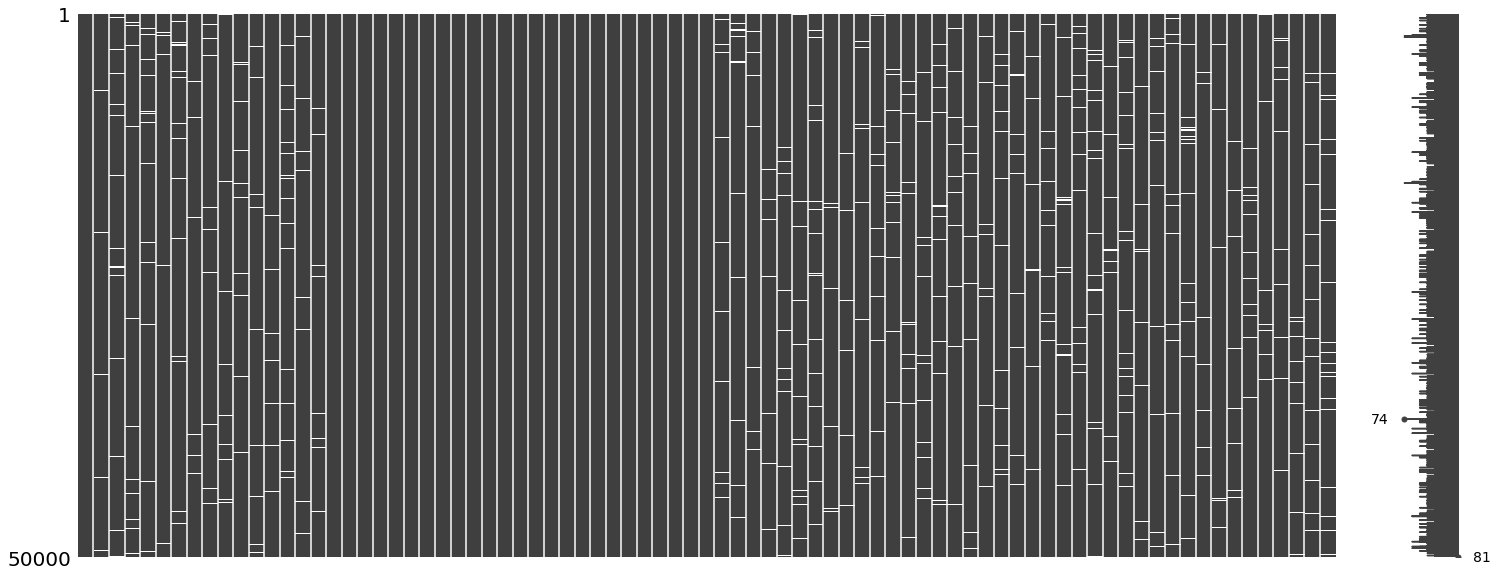

In [20]:
import missingno as msno
%matplotlib inline
msno.matrix(df1)


# E-Handling Missing values by Interpolate Method

In [14]:
df3=df1.interpolate(method='linear')

In [15]:
df3.isnull().sum()

row_id    0
F_1_0     0
F_1_1     0
F_1_2     0
F_1_3     0
         ..
F_4_10    0
F_4_11    0
F_4_12    0
F_4_13    0
F_4_14    0
Length: 81, dtype: int64

<AxesSubplot:>

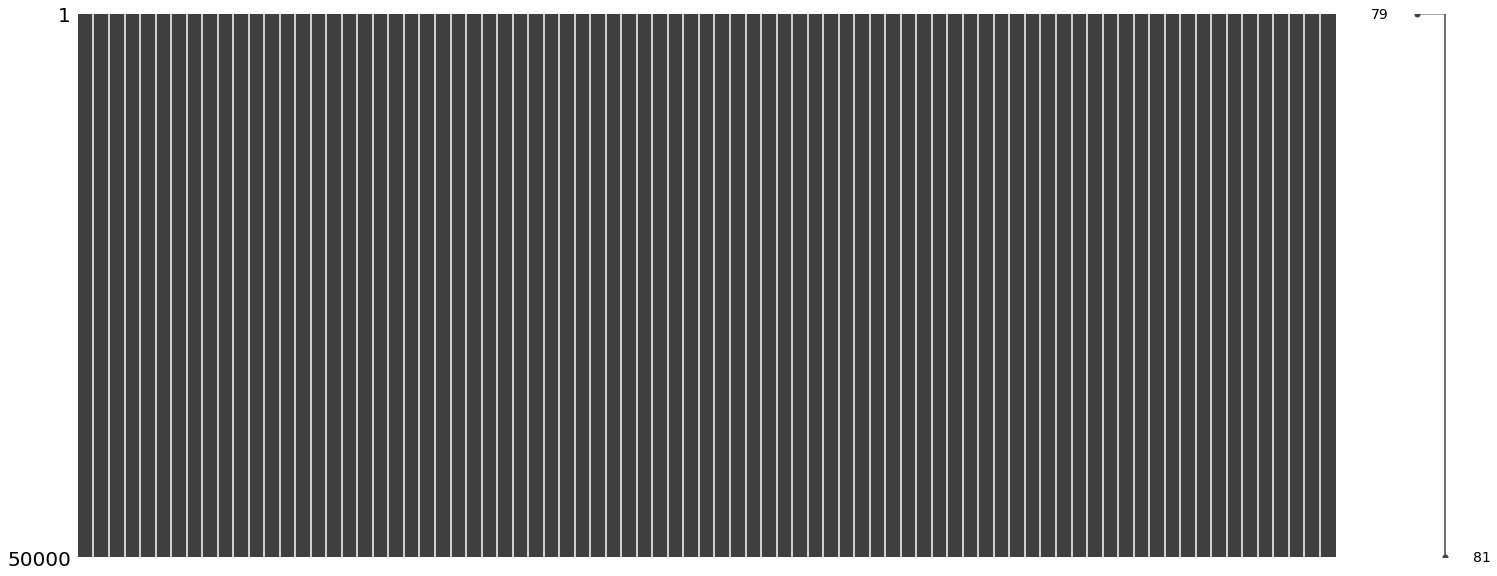

In [16]:
df3.isnull().sum().sum()
import missingno as msno
%matplotlib inline
msno.matrix(df3)

In [48]:
X=df3.iloc[:,1:-1].values
y=df3.iloc[:,-1].values

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [50]:
print(X.shape)

(50000, 79)


In [51]:
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))

continuous


In [52]:
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_train= label_encoder.fit_transform(y_train)
print(utils.multiclass.type_of_target(y_train))

continuous
multiclass


## 1- Decision Tree for Interpolate Method

In [53]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(X_train,y_train)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
tree.fit(X_train,y_train)

MemoryError: could not allocate 5202247680 bytes

In [ ]:
print('The accuracy of Decision Tree: ',tree.score(X_train,y_train))

In [ ]:
prediction=tree.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
prediction=tree.predict(X_test)

In [ ]:
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Decision Tree")
plt.scatter(y_test,prediction)
plt.plot([-6,10],[-6,40000],color='red')
plt.show() 

## 2- Random Forest for Interpolate Method

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forst=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
forst.fit(X_train,y_train)

In [ ]:
print('The accuracy of Random Forest : ',forst.score(X_train,y_train))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
forst.fit(X_train,y_train)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [ ]:
prediction=forst.predict(X_test)

In [ ]:
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Random Forest")
plt.scatter(y_test,prediction)
plt.plot([-6,5],[-10000,20000],color='red')
plt.show()

## 3- Linear Regression for Interpolate Method

In [ ]:
from sklearn.linear_model import LinearRegression
Lin=LinearRegression()
Lin.fit(X_train,y_train)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
Lin.fit(X_train,y_train)

In [ ]:
print('The accuracy of LinearRegression: ',Lin.score(X_train,y_train))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Lin.intercept_

In [ ]:
prediction=Lin.predict(X_test)

In [ ]:
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Linear Regression")
plt.scatter(y_test,prediction)
plt.plot([-4,2],[-40000,60000],color='red')
plt.show()